# Explanation - Shap

In [55]:
import shap
import tensorflow as tf
from keras.models import load_model

from data.file import model_convolutional
from data.load import load_train_data, load_test_data
from model.convolutional import reshape_input
from reporting.evaluation import plot_shap
from reporting.images import display_dataframe
from pandas import concat, DataFrame
from numpy import argmax

In [56]:
print("SHAP version is      :", shap.__version__)
print("Tensorflow version is:", tf.__version__)

tf.compat.v1.disable_eager_execution()

SHAP version is      : 0.40.0
Tensorflow version is: 2.6.2


## Load Test Data

In [57]:
x_test, y_test = load_test_data()
x_test_reshaped, y_test_reshaped = reshape_input(x_test, y_test)

## Load Pretrained Model
The model was pretrained [here](../modeling/01_train_model.ipynb) and persisted into [data](../../data/model/convolutional).

In [58]:
model = load_model(model_convolutional)

## Wrong Predictions
The following code predicts n items out of the test dataset.

In [59]:
compare_items = 10000
prediction = [argmax(x) for x in model.predict(x_test_reshaped[:compare_items])]
expectation = y_test_reshaped[:compare_items]

comparison = concat([expectation.rename('actual'), DataFrame(prediction, columns=['prediction'])], axis=1)
missmatch_ids = comparison[comparison.prediction != comparison.actual].index

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


The following items have bad predictions.

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


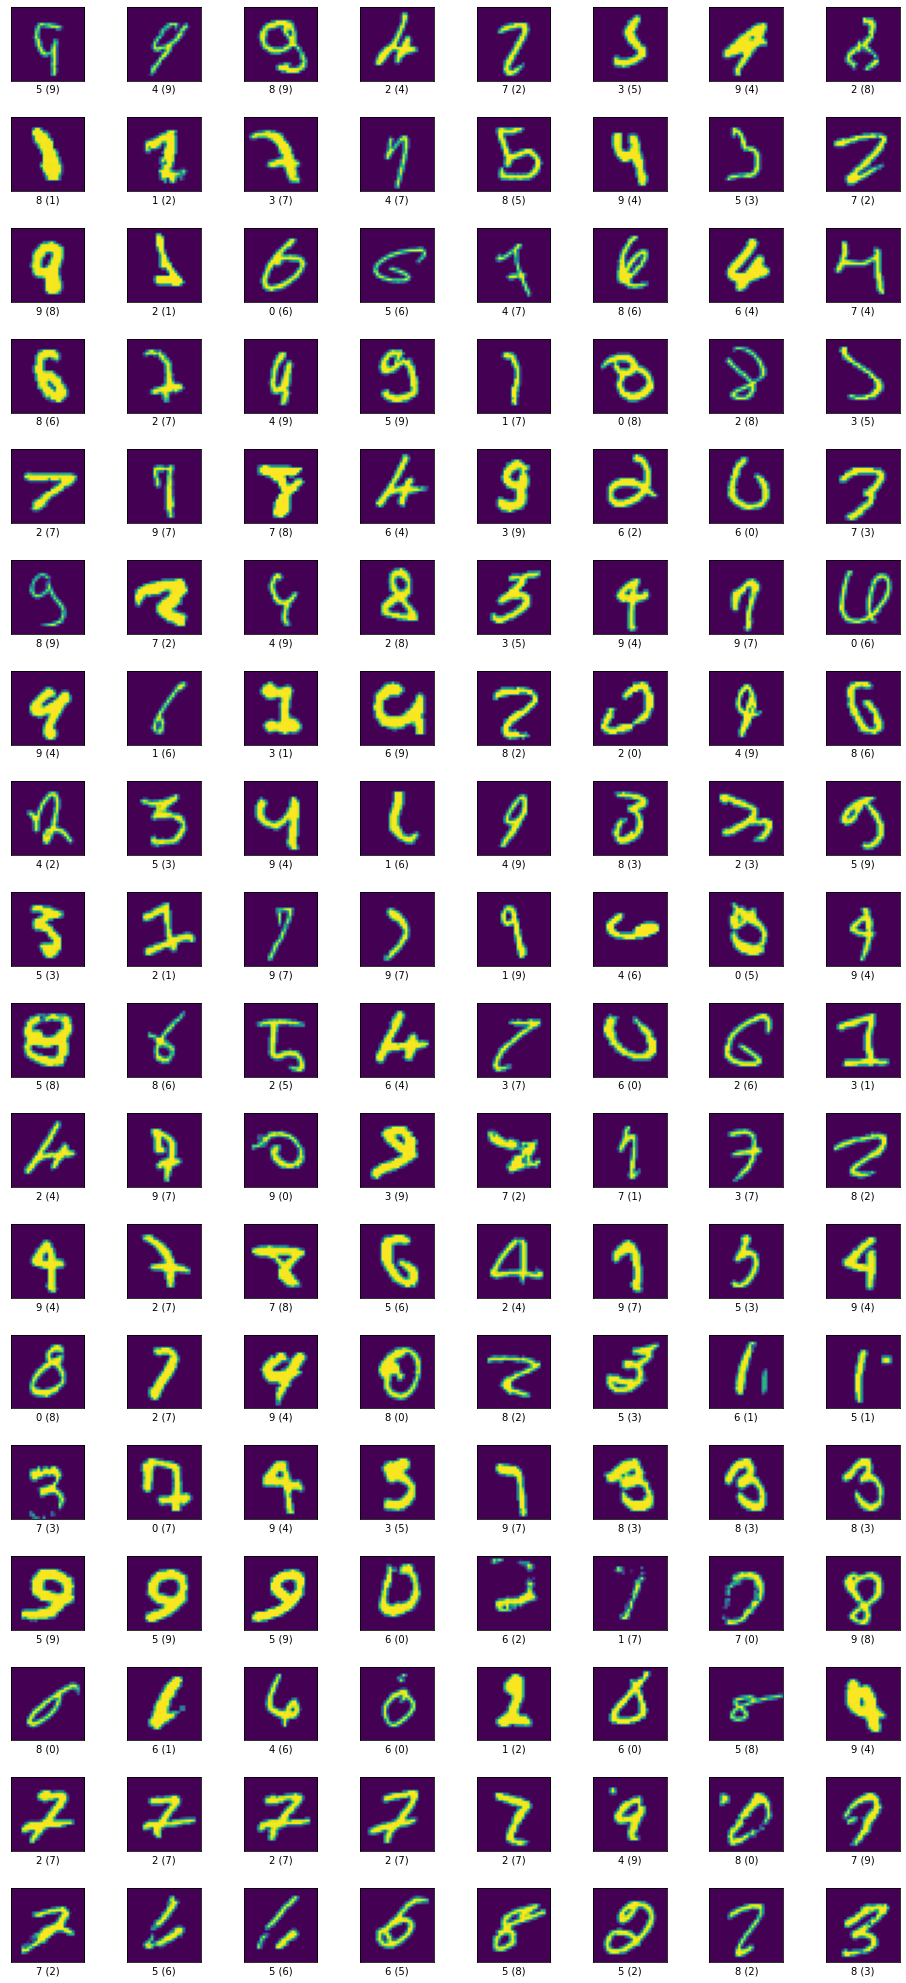

In [60]:
missmatches = comparison.iloc[missmatch_ids]
labels = missmatches.prediction.map(str) + " (" + missmatches.actual.map(str) + ")"
display_dataframe(x_test.iloc[missmatch_ids], labels = labels.tolist(), cols=8)

In [61]:
comparison[comparison.prediction != comparison.actual]

,actual,prediction
62,9,5
92,9,4
151,9,8
247,4,2
321,2,7
...,...,...
9729,5,6
9755,8,5
9768,2,5
9839,2,8


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


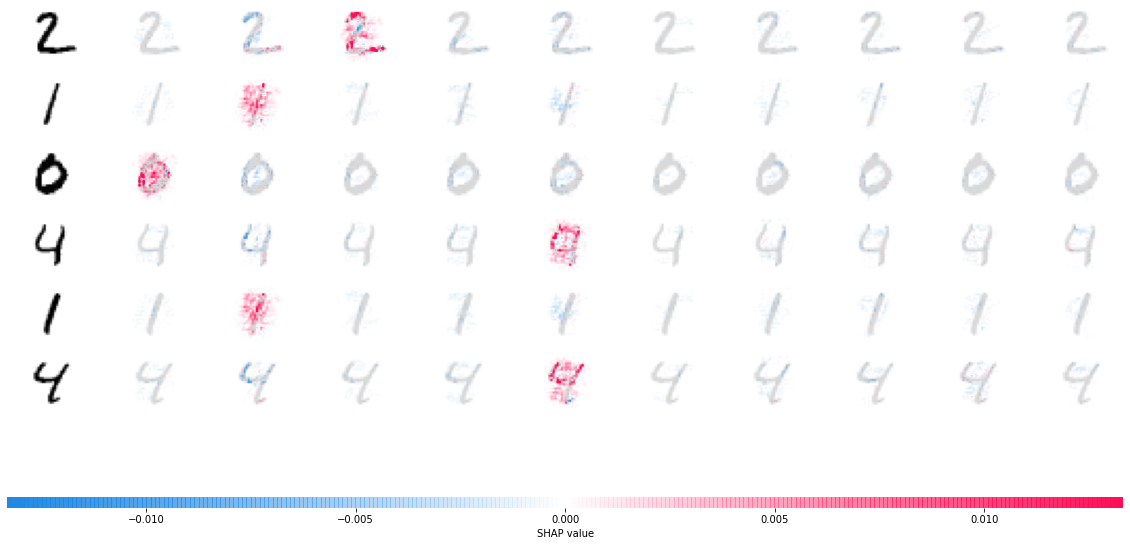

In [62]:
plot_shap(model, x_test_reshaped, elements=7, population=100)

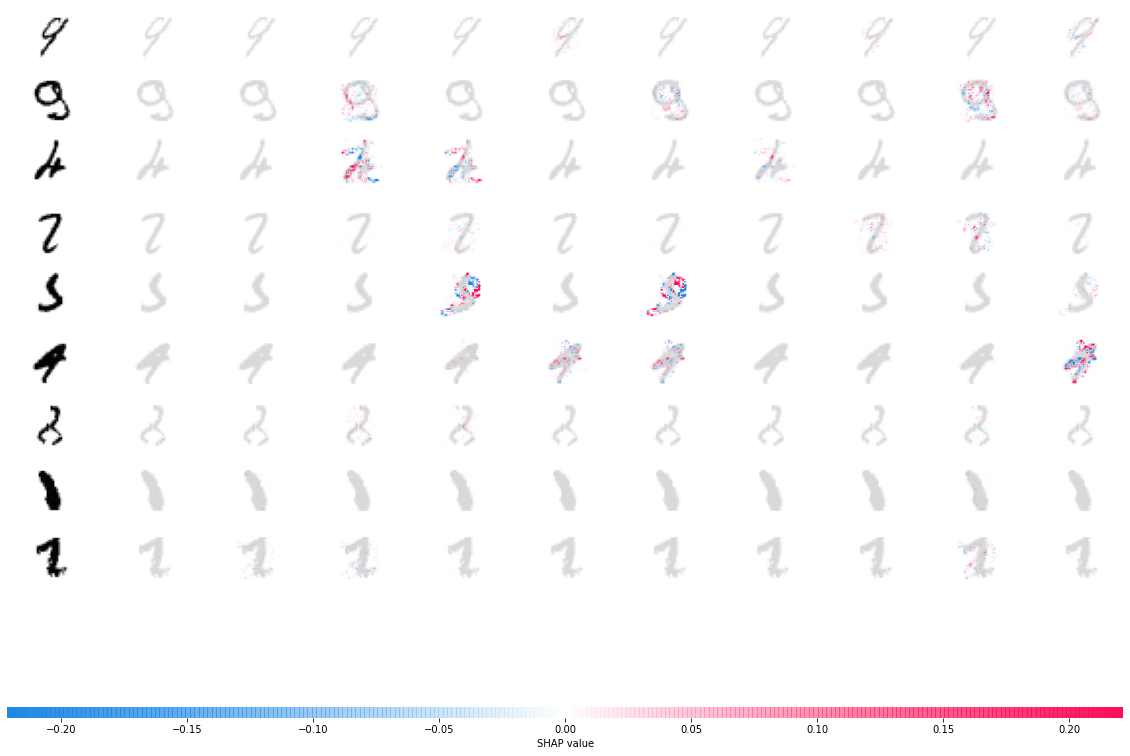

In [63]:
mm = x_test_reshaped[missmatch_ids]
plot_shap(model, mm, elements=10)